In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [92]:
df = pd.read_csv('pokemon.csv')
df.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [93]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [95]:
df['percentage_male'] = df['percentage_male'].fillna(df['percentage_male'].mean())
df['type2'] = df['type2'].fillna('None')
df[['height_m', 'weight_kg']] = df[['height_m', 'weight_kg']].apply(pd.to_numeric, errors='coerce')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [97]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']
#Best_Of_The_Best покемоны
BOTB_pokemons = []

for stat in stats:
    max_value = df[stat].max()
    pokemon_row = df[df[stat] == max_value].iloc[0]
    BOTB_pokemons.append({'Max Stat': stat, 'Name': pokemon_row['name'], 'Value': max_value})

BOTB_df = pd.DataFrame(BOTB_pokemons)
BOTB_df

,Max Stat,Name,Value
0,hp,Blissey,255.0
1,attack,Heracross,185.0
2,defense,Steelix,230.0
3,sp_attack,Mewtwo,194.0
4,sp_defense,Shuckle,230.0
5,speed,Deoxys,180.0
6,weight_kg,Cosmoem,999.9


In [98]:
top_pokemon_names = BOTB_df['Name']
top_pokemons_full_stats = df[df['name'].isin(top_pokemon_names)]
top_pokemons_full_stats

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
149,"['Pressure', 'Unnerve']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,150,194,120,140,psychic,None,122.0,1,1
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.5,1.0,...,50.000000,208,55,95,30,steel,ground,400.0,2,0
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,50.000000,213,10,230,5,bug,rock,20.5,2,0
213,"['Swarm', 'Guts', 'Moxie']",0.5,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,50.000000,214,40,105,75,bug,fighting,54.0,2,0
241,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.000000,242,75,135,55,normal,None,46.8,2,0
385,['Pressure'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,386,95,90,180,psychic,None,60.8,3,1
789,['Sturdy'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,790,29,131,37,psychic,None,999.9,7,1


Из самых-самых покемонов 3-е являются легендарными при этом имеют одинаковые стихии, другие 3-е имеют две стихии.

In [99]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']
#сумма всех stats для определения лучшего
df['total_stats'] = df[stats].sum(axis=1)
BOTB_generation = df.loc[df.groupby('generation')['total_stats'].idxmax()]
result = BOTB_generation[['generation', 'name', 'total_stats'] + stats + ['type1', 'type2', 'is_legendary']]
result

,generation,name,total_stats,hp,attack,defense,sp_attack,sp_defense,speed,weight_kg,type1,type2,is_legendary
142,1,Snorlax,1000.0,160,110,65,65,110,30,460.0,normal,None,0
207,2,Steelix,1010.0,75,125,230,55,95,30,400.0,steel,ground,0
382,3,Groudon,1720.0,100,180,160,150,90,90,950.0,ground,None,1
486,4,Giratina,1430.0,150,120,100,120,100,90,750.0,ghost,dragon,1
643,5,Zekrom,1025.0,100,150,120,120,100,90,345.0,dragon,electric,1
712,6,Avalugg,1019.0,95,117,184,44,46,28,505.0,ice,None,0
796,7,Celesteela,1569.9,97,101,103,107,101,61,999.9,steel,flying,1


Среди лучших по поколениям легендарными являются большинство покемонов, в основном лучшие покемоны имеют большой вес

In [100]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']
#сумма всех stats для определения лучшего
df['total_stats'] = df[stats].sum(axis=1)

legendary_pokemon = df[df['is_legendary'] == 1]['total_stats'].mean()
non_legendary_pokemon = df[df['is_legendary'] == 0]['total_stats'].mean()
print('Ср. сила легендарных покемонов:', legendary_pokemon)
print('Ср. сила нелегендарных покемонов:', non_legendary_pokemon)
if legendary_pokemon > non_legendary_pokemon:
  print(f'Легендарные покемоны сильнее в {legendary_pokemon / non_legendary_pokemon} раз')
else:
  print(f'Нелегендарные покемоны сильнее в {non_legendary_pokemon / legendary_pokemon} раз')



Ср. сила легендарных покемонов: 811.7600000000001
Ср. сила нелегендарных покемонов: 457.24090287277704
Легендарные покемоны сильнее в 1.7753442329849145 раз


In [101]:
#сравнение по легендарности и поколению
mean_in_gen = df.groupby(['generation', 'is_legendary'])['total_stats'].mean()
print(mean_in_gen)

generation  is_legendary
1           0               448.870548
            1               682.800000
2           0               441.973404
            1               780.500000
3           0               454.544800
            1               894.040000
4           0               481.417021
            1               865.346154
5           0               453.211888
            1               767.961538
6           0               458.509091
            1               825.733333
7           0               476.512698
            1               799.905882
Name: total_stats, dtype: float64


In [102]:
#сравнение по легендарности и стихии 1
mean_in_type1 = df.groupby(['type1', 'is_legendary'])['total_stats'].mean()
print(mean_in_type1)

type1     is_legendary
bug       0                399.882609
          1                727.033333
dark      0                463.665385
          1                997.166667
dragon    0                523.415000
          1                934.157143
electric  0                445.876471
          1                658.420000
fairy     0                424.588235
          1                895.000000
fighting  0                473.496429
fire      0                481.187234
          1                824.400000
flying    0                436.500000
          1                643.000000
ghost     0                468.669231
          1               1430.000000
grass     0                434.783784
          1                641.925000
ground    0                509.940000
          1               1194.000000
ice       0                521.790476
          1                695.200000
normal    0                431.975490
          1                912.166667
poison    0                

In [103]:
#сравнение по легендарности и стихии 2
mean_in_type2 = df.groupby(['type2', 'is_legendary'])['total_stats'].mean()
print(mean_in_type1)

type1     is_legendary
bug       0                399.882609
          1                727.033333
dark      0                463.665385
          1                997.166667
dragon    0                523.415000
          1                934.157143
electric  0                445.876471
          1                658.420000
fairy     0                424.588235
          1                895.000000
fighting  0                473.496429
fire      0                481.187234
          1                824.400000
flying    0                436.500000
          1                643.000000
ghost     0                468.669231
          1               1430.000000
grass     0                434.783784
          1                641.925000
ground    0                509.940000
          1               1194.000000
ice       0                521.790476
          1                695.200000
normal    0                431.975490
          1                912.166667
poison    0                

In [104]:
legendary_pokemon = df[df['is_legendary'] == 1]
type1_counts = legendary_pokemon['type1'].value_counts()
type2_counts = legendary_pokemon['type2'].value_counts()

legendary_type_counts = type1_counts.add(type2_counts, fill_value=0)
legendary_type_counts = legendary_type_counts.drop('None')
legendary_type_counts.sort_values(ascending=False)

,count
psychic,21.0
dragon,11.0
flying,11.0
steel,10.0
fire,7.0
water,7.0
fairy,7.0
grass,6.0
electric,6.0
fighting,6.0


Наиболее часто среди легендарных покемонов встречается стихия "psychic"

In [105]:
stats = ['hp', 'attack', 'defense', 'speed', 'weight_kg']
stats_type_mean = df.groupby('type1')[stats].mean()
stats_type_mean

,hp,attack,defense,speed,weight_kg
type1,,,,,
bug,56.722222,70.125000,70.847222,63.569444,33.083333
dark,72.551724,87.793103,70.517241,75.310345,69.096552
dragon,79.851852,106.407407,86.259259,76.111111,107.125926
electric,60.512821,70.820513,61.820513,85.410256,37.944737
fairy,73.944444,62.111111,68.166667,53.666667,23.555556
fighting,71.428571,99.178571,66.392857,64.285714,58.675000
fire,68.730769,81.500000,67.788462,73.346154,66.096000
flying,68.000000,66.666667,65.000000,99.666667,52.000000
ghost,63.370370,72.740741,79.518519,58.333333,69.570370


Средние хар-ки покемонов по стихии 1

In [106]:
stats_generation_mean = df.groupby('generation')[stats].mean()
stats_generation_mean

,hp,attack,defense,speed,weight_kg
generation,,,,,
1,64.344371,74.529801,70.079470,70.152318,45.827820
2,70.980000,69.960000,71.790000,61.610000,49.105000
3,65.666667,77.185185,72.637037,63.577778,67.077778
4,73.102804,82.672897,76.168224,70.074766,76.885047
5,70.314103,80.557692,71.961538,66.519231,52.402564
6,71.111111,76.527778,73.555556,66.652778,52.225352
7,70.575000,84.637500,78.012500,64.037500,98.300000


Средние хар-ки покемонов по поколениям

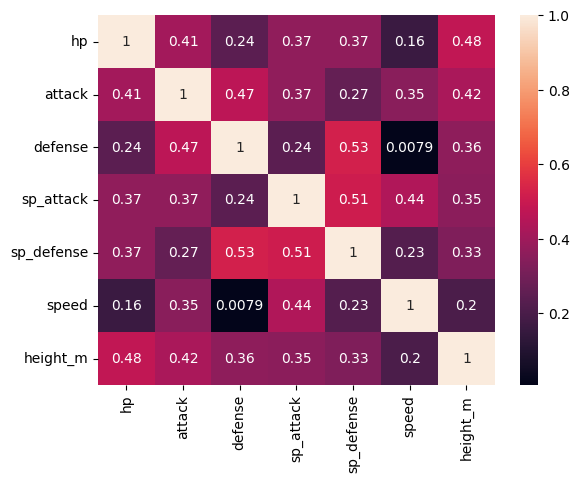

In [107]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
stats_heightm = stats + ['height_m']
correlation_matrix = df[stats_heightm].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

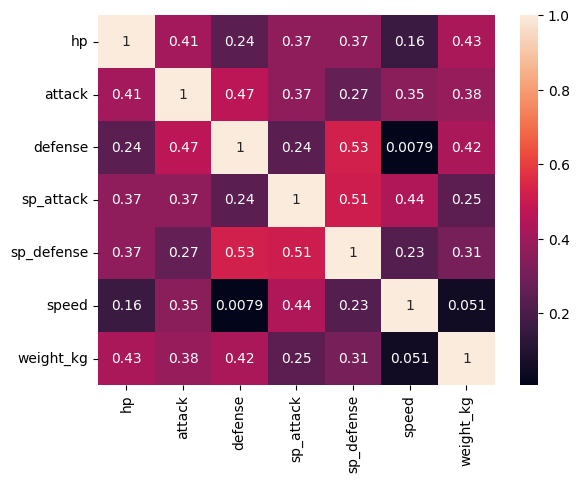

In [108]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
stats_weightkg = stats + ['weight_kg']
correlation_matrix = df[stats_weightkg].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [109]:
X = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'is_legendary']]
y = df['total_stats']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

feature_stats = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('ключевые хар-ки для определения силы покемона')
print(feature_stats)
print('средняя ошибка', mae)

ключевые хар-ки для определения силы покемона
attack          0.287593
hp              0.204519
sp_defense      0.163217
defense         0.158672
sp_attack       0.079358
is_legendary    0.059374
speed           0.047267
dtype: float64
средняя ошибка 43.5622344128956


Сила и очки здоровья являются основными показателями для определения общей силы покемона